## Objective: Find out what author studies, by their abstracts.

In [23]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# https://www.kaggle.com/Cornell-University/arxiv
METADATA_PATH='../data/arxiv-metadata-oai-snapshot.json'

In [24]:
%%time

titles = []
abstracts = []
ids = []
authors = []
update_dates = []
categories = []

with open(METADATA_PATH) as f_in:
    for i,line in enumerate(f_in):
        row = json.loads(line)
        titles.append(row["title"])
        abstracts.append(row["abstract"])
        ids.append(row["id"])
        authors.append(row["authors"]) 
        update_dates.append(row["update_date"])
        categories.append(row["categories"])
        
df_papers = pd.DataFrame({
    'id' : ids,
    'title' : titles,
    'abstract' : abstracts,
    'authors' : authors,
    'update_date' : update_dates,
    'categories' : categories,
})

del titles, abstracts, ids, authors, update_dates, categories

CPU times: user 31.5 s, sys: 2.55 s, total: 34 s
Wall time: 34.2 s


In [25]:
print("using arXiv data up to", df_papers.update_date.max())

using arXiv data up to 2021-08-20


In [26]:
print("using arXiv data from", df_papers.update_date.min())

using arXiv data from 2007-05-23


In [4]:
df_papers.head()

id                                              title  \
0  0704.0001  Calculation of prompt diphoton production cros...   
1  0704.0002           Sparsity-certifying Graph Decompositions   
2  0704.0003  The evolution of the Earth-Moon system based o...   
3  0704.0004  A determinant of Stirling cycle numbers counts...   
4  0704.0005  From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...   

                                            abstract  \
0    A fully differential calculation in perturba...   
1    We describe a new algorithm, the $(k,\ell)$-...   
2    The evolution of Earth-Moon system is descri...   
3    We show that a determinant of Stirling cycle...   
4    In this paper we show how to compute the $\L...   

                                             authors update_date  \
0  C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...  2008-11-26   
1                    Ileana Streinu and Louis Theran  2008-12-13   
2                                        Hongjun Pan  2008-01-13   
3                                       David Callan  2007-05-23   
4           Wael Abu-Shammala and Alberto Torchinsky  2013-10-15   

        categories  
0           hep-ph  
1    math.CO cs.CG  
2   physics.gen-ph  
3          math.CO  
4  math.CA math.FA

In [5]:
df_papers["categories"].value_counts().head(40)

astro-ph              86912
hep-ph                75131
quant-ph              56785
hep-th                54402
cond-mat.mtrl-sci     32103
cs.CV                 31161
cond-mat.mes-hall     30946
gr-qc                 26536
math.AP               26198
astro-ph.SR           24059
cond-mat.str-el       23254
astro-ph.GA           23227
math.CO               23061
math.PR               19994
cs.IT math.IT         19951
astro-ph.CO           19350
astro-ph.HE           18488
nucl-th               18079
cond-mat.stat-mech    17816
math.NT               17588
math.AG               17044
hep-ex                16124
cond-mat.supr-con     15163
math.DG               13646
physics.optics        13213
cs.CL                 12193
math.OC               12147
cs.LG stat.ML         11912
cond-mat.soft         11568
math-ph math.MP       11413
astro-ph.EP           11379
math.DS               10760
hep-ph hep-ex         10756
math.FA               10607
cond-mat               9462
hep-lat             

In [6]:
relevant_categories = ["cs.AI", "cs.CV", "cs.LG ", "cs.NE", "stat.ML"] 
# AI, Computer Vision, Machine Learning, Neural systems, Machine Learning

In [7]:
# https://www.kaggle.com/aashita/word-clouds-of-various-shapes
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'We', 'paper', 'new', 'nthe', 'proposed', 'method',
                      'using', 'present', 'provide', 'well', 'show', 'propose', 'nand', 'given'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask,
                    min_word_length = 4,
                    #normalize_plurals = True, 
                    #collocations = True,      
                    #collocation_threshold = 10      
                         )
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  


In [8]:
def filter_papers_by_categories(df, cat_list):
    return df[df.stack().str.contains('|'.join(cat_list)).any(level=0)]

In [9]:
df_filtered = filter_papers_by_categories(df_papers, relevant_categories)
df_filtered.head()

id                                              title  \
46   0704.0047  Intelligent location of simultaneously active ...   
49   0704.0050  Intelligent location of simultaneously active ...   
303  0704.0304                  The World as Evolving Information   
670  0704.0671              Learning from compressed observations   
953  0704.0954  Sensor Networks with Random Links: Topology De...   

                                              abstract  \
46     The intelligent acoustic emission locator is...   
49     Part I describes an intelligent acoustic emi...   
303    This paper discusses the benefits of describ...   
670    The problem of statistical learning is to co...   
953    In a sensor network, in practice, the commun...   

                              authors update_date  \
46             T. Kosel and I. Grabec  2009-09-29   
49             T. Kosel and I. Grabec  2007-05-23   
303                 Carlos Gershenson  2013-04-05   
670                    Maxim Raginsky  2016-11-15   
953  Soummya Kar and Jose M. F. Moura  2009-11-13   

                       categories  
46                    cs.NE cs.AI  
49                    cs.NE cs.AI  
303  cs.IT cs.AI math.IT q-bio.PE  
670           cs.IT cs.LG math.IT  
953           cs.IT cs.LG math.IT

In [10]:
def show_wc(papers):
    if len(papers) == 0:
        print("No papers found")
        return False
    display(papers)
    plot_wordcloud(list(papers.abstract))
    return True

id                                              title  \
46              0704.0047  Intelligent location of simultaneously active ...   
49              0704.0050  Intelligent location of simultaneously active ...   
303             0704.0304                  The World as Evolving Information   
670             0704.0671              Learning from compressed observations   
953             0704.0954  Sensor Networks with Random Links: Topology De...   
...                   ...                                                ...   
1924880  quant-ph/0607111  `Plausibilities of plausibilities': an approac...   
1925361  quant-ph/0609117  Quantum Pattern Retrieval by Qubit Networks wi...   
1926592  quant-ph/0702072                    Markovian Entanglement Networks   
1928672  quant-ph/9802028       Analogue Quantum Computers for Data Analysis   
1930207  quant-ph/9907009  The importance of quantum decoherence in brain...   

                                                  abstract  \
46         The intelligent acoustic emission locator is...   
49         Part I describes an intelligent acoustic emi...   
303        This paper discusses the benefits of describ...   
670        The problem of statistical learning is to co...   
953        In a sensor network, in practice, the commun...   
...                                                    ...   
1924880    Probability-like parameters appearing in som...   
1925361    Qubit networks with long-range interactions ...   
1926592    Graphical models of probabilistic dependenci...   
1928672    Analogue computers use continuous properties...   
1930207    Based on a calculation of neural decoherence...   

                                                   authors update_date  \
46                                  T. Kosel and I. Grabec  2009-09-29   
49                                  T. Kosel and I. Grabec  2007-05-23   
303                                      Carlos Gershenson  2013-04-05   
670                                         Maxim Raginsky  2016-11-15   
953                       Soummya Kar and Jose M. F. Moura  2009-11-13   
...                                                    ...         ...   
1924880    P. G. L. Porta Mana, A. M{\aa}nsson, G. Bj\"ork  2007-05-23   
1925361    M.Cristina Diamantini and Carlo A. Trugenberger  2009-11-13   
1926592         Pierfrancesco La Mura and Lukasz Swiatczak  2011-11-09   
1928672  Alexander Yu. Vlasov (FCR/IRH, St.-Petersburg,...  2007-05-23   
1930207                                        Max Tegmark  2009-10-07   

                                                categories  
46                                             cs.NE cs.AI  
49                                             cs.NE cs.AI  
303                           cs.IT cs.AI math.IT q-bio.PE  
670                                    cs.IT cs.LG math.IT  
953                                    cs.IT cs.LG math.IT  
...                                                    ...  
1924880                                     quant-ph cs.AI  
1925361                     quant-ph cond-mat.dis-nn cs.NE  
1926592                                     quant-ph cs.AI  
1928672                                     quant-ph cs.CV  
1930207  quant-ph cond-mat.dis-nn cs.NE physics.bio-ph ...  

[149939 rows x 6 columns]

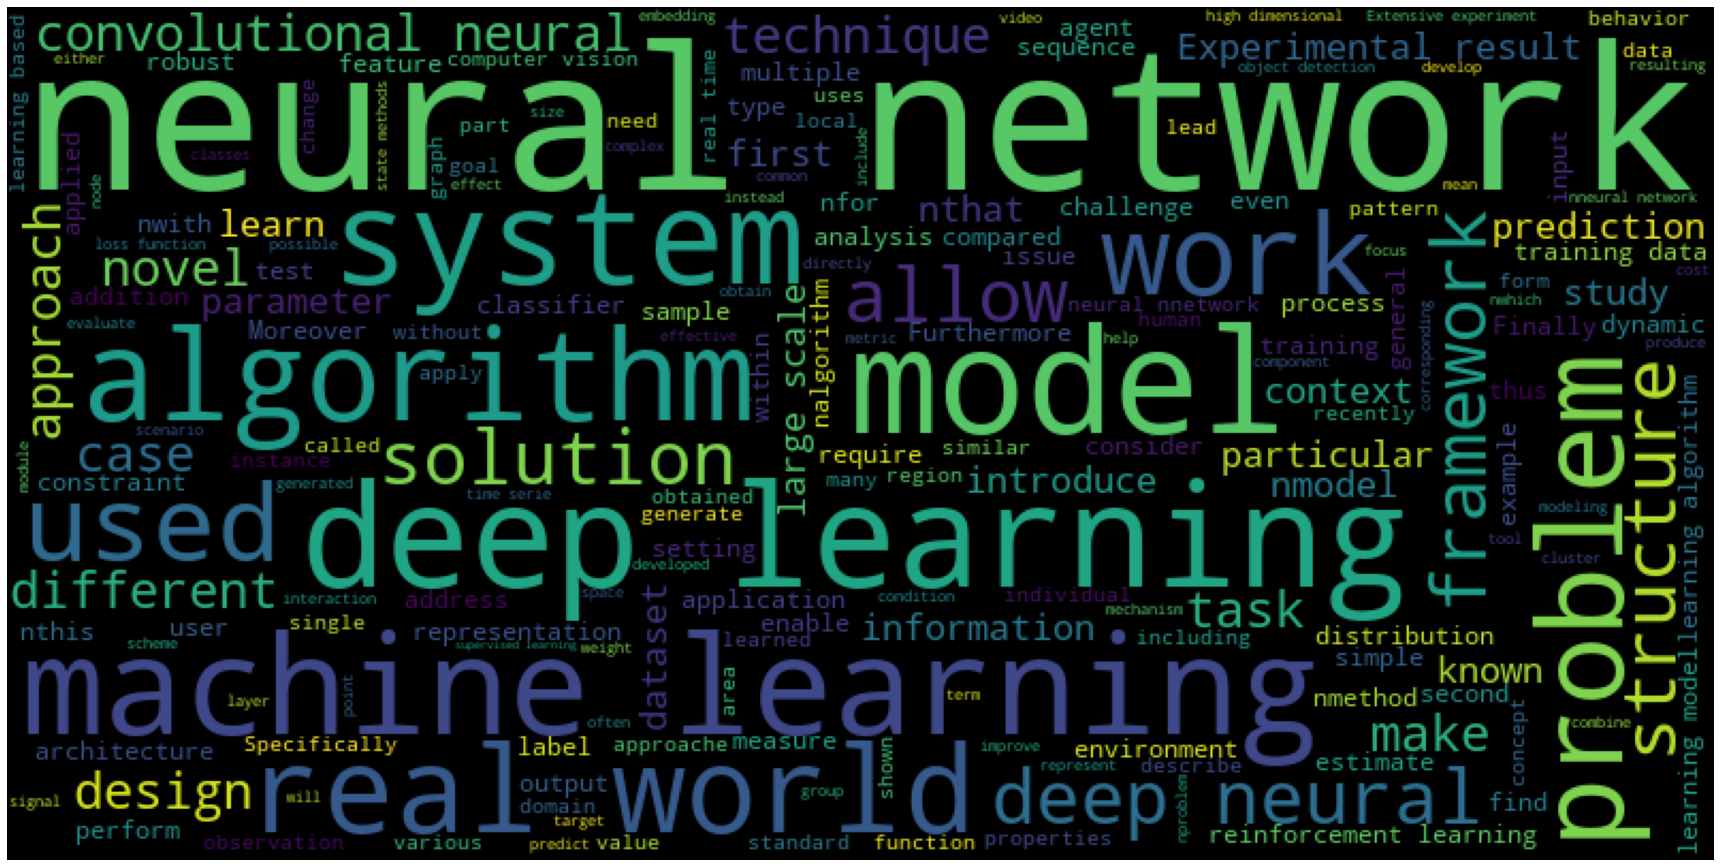

In [11]:
if show_wc(df_filtered):
    plt.savefig(f"all_time.png")

In [20]:
df_before_5_years = df_filtered[df_filtered["update_date"] < "2016-01-01"]
df_before_5_years.head()

id                                              title  \
46   0704.0047  Intelligent location of simultaneously active ...   
49   0704.0050  Intelligent location of simultaneously active ...   
303  0704.0304                  The World as Evolving Information   
953  0704.0954  Sensor Networks with Random Links: Topology De...   
984  0704.0985  Architecture for Pseudo Acausal Evolvable Embe...   

                                              abstract  \
46     The intelligent acoustic emission locator is...   
49     Part I describes an intelligent acoustic emi...   
303    This paper discusses the benefits of describ...   
953    In a sensor network, in practice, the commun...   
984    Advances in semiconductor technology are con...   

                              authors update_date  \
46             T. Kosel and I. Grabec  2009-09-29   
49             T. Kosel and I. Grabec  2007-05-23   
303                 Carlos Gershenson  2013-04-05   
953  Soummya Kar and Jose M. F. Moura  2009-11-13   
984           Mohd Abubakr, R.M.Vinay  2007-05-23   

                       categories  
46                    cs.NE cs.AI  
49                    cs.NE cs.AI  
303  cs.IT cs.AI math.IT q-bio.PE  
953           cs.IT cs.LG math.IT  
984                   cs.NE cs.AI

id                                              title  \
46              0704.0047  Intelligent location of simultaneously active ...   
49              0704.0050  Intelligent location of simultaneously active ...   
303             0704.0304                  The World as Evolving Information   
953             0704.0954  Sensor Networks with Random Links: Topology De...   
984             0704.0985  Architecture for Pseudo Acausal Evolvable Embe...   
...                   ...                                                ...   
1924880  quant-ph/0607111  `Plausibilities of plausibilities': an approac...   
1925361  quant-ph/0609117  Quantum Pattern Retrieval by Qubit Networks wi...   
1926592  quant-ph/0702072                    Markovian Entanglement Networks   
1928672  quant-ph/9802028       Analogue Quantum Computers for Data Analysis   
1930207  quant-ph/9907009  The importance of quantum decoherence in brain...   

                                                  abstract  \
46         The intelligent acoustic emission locator is...   
49         Part I describes an intelligent acoustic emi...   
303        This paper discusses the benefits of describ...   
953        In a sensor network, in practice, the commun...   
984        Advances in semiconductor technology are con...   
...                                                    ...   
1924880    Probability-like parameters appearing in som...   
1925361    Qubit networks with long-range interactions ...   
1926592    Graphical models of probabilistic dependenci...   
1928672    Analogue computers use continuous properties...   
1930207    Based on a calculation of neural decoherence...   

                                                   authors update_date  \
46                                  T. Kosel and I. Grabec  2009-09-29   
49                                  T. Kosel and I. Grabec  2007-05-23   
303                                      Carlos Gershenson  2013-04-05   
953                       Soummya Kar and Jose M. F. Moura  2009-11-13   
984                                Mohd Abubakr, R.M.Vinay  2007-05-23   
...                                                    ...         ...   
1924880    P. G. L. Porta Mana, A. M{\aa}nsson, G. Bj\"ork  2007-05-23   
1925361    M.Cristina Diamantini and Carlo A. Trugenberger  2009-11-13   
1926592         Pierfrancesco La Mura and Lukasz Swiatczak  2011-11-09   
1928672  Alexander Yu. Vlasov (FCR/IRH, St.-Petersburg,...  2007-05-23   
1930207                                        Max Tegmark  2009-10-07   

                                                categories  
46                                             cs.NE cs.AI  
49                                             cs.NE cs.AI  
303                           cs.IT cs.AI math.IT q-bio.PE  
953                                    cs.IT cs.LG math.IT  
984                                            cs.NE cs.AI  
...                                                    ...  
1924880                                     quant-ph cs.AI  
1925361                     quant-ph cond-mat.dis-nn cs.NE  
1926592                                     quant-ph cs.AI  
1928672                                     quant-ph cs.CV  
1930207  quant-ph cond-mat.dis-nn cs.NE physics.bio-ph ...  

[19488 rows x 6 columns]

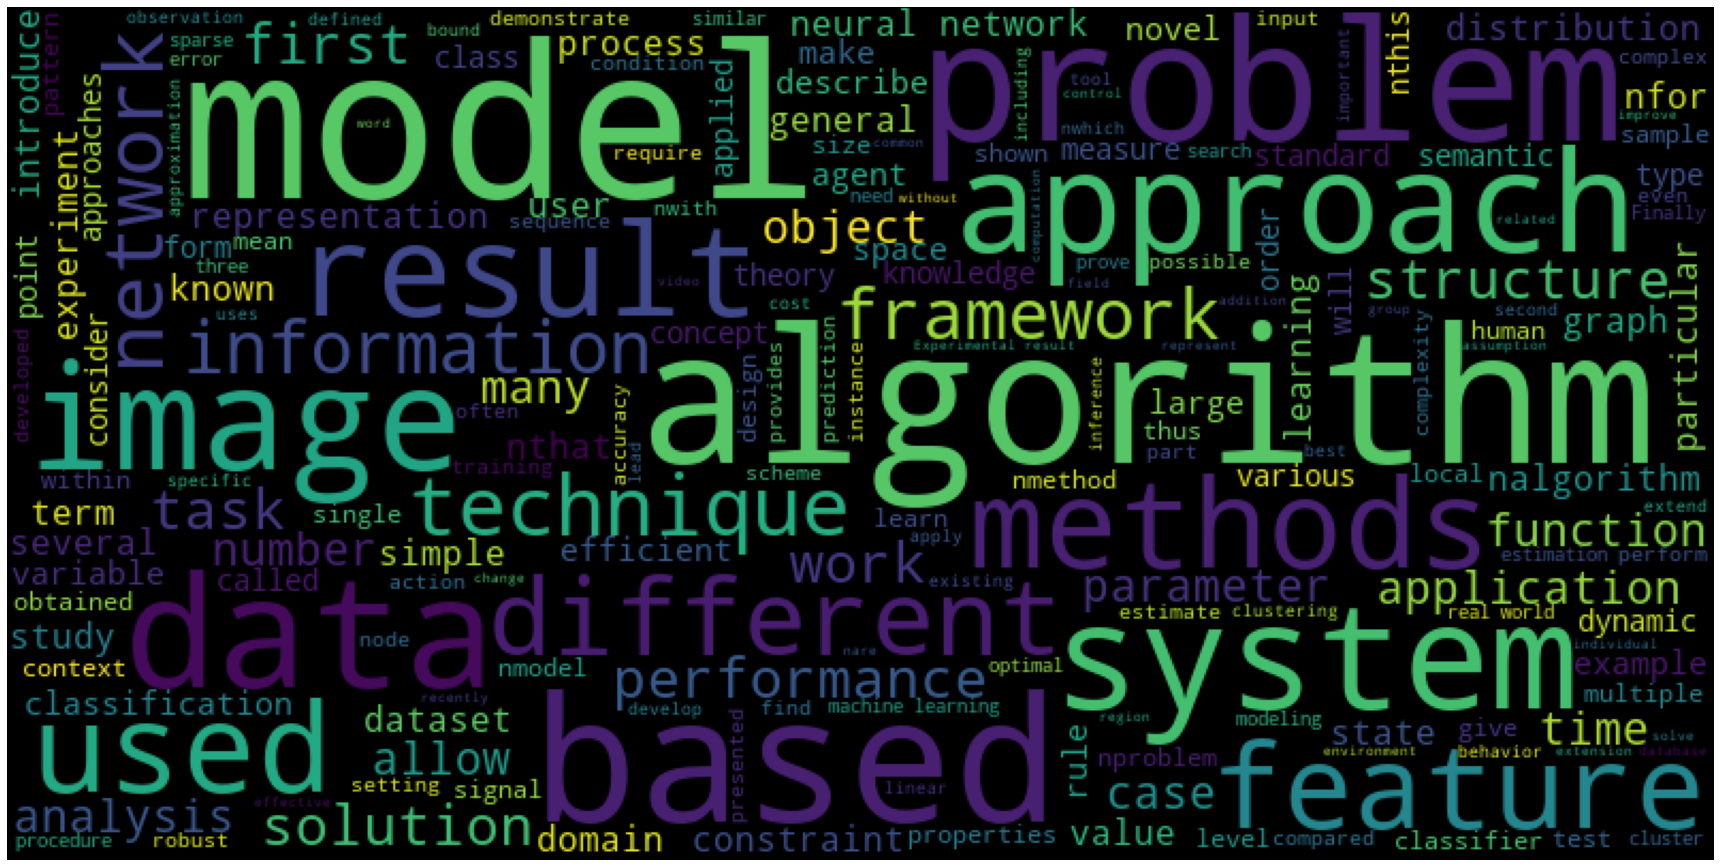

In [21]:
if show_wc(df_before_5_years):
    plt.savefig(f"df_before_5_years.png")

In [12]:
df_last_5_years = df_filtered[df_filtered["update_date"] > "2016-01-01"]
df_last_5_years.head()

id                                              title  \
670   0704.0671              Learning from compressed observations   
1674  0704.1675  Exploiting Social Annotation for Automatic Res...   
3514  0704.3515  Comparing Robustness of Pairwise and Multiclas...   
7671  0705.3669  Structural Health Monitoring Using Neural Netw...   
9271  0706.0585  A Novel Model of Working Set Selection for SMO...   

                                               abstract  \
670     The problem of statistical learning is to co...   
1674    Information integration applications, such a...   
3514    Noise, corruptions and variations in face im...   
7671    Composite fabrication technologies now provi...   
9271    In the process of training Support Vector Ma...   

                                                authors update_date  \
670                                      Maxim Raginsky  2016-11-15   
1674           Anon Plangprasopchok and Kristina Lerman  2016-09-08   
3514                   J. Uglov, V. Schetinin, C. Maple  2016-02-17   
7671                                    Donald A. Sofge  2016-11-17   
9271  Zhendong Zhao, Lei Yuan, Yuxuan Wang, Forrest ...  2016-11-15   

               categories  
670   cs.IT cs.LG math.IT  
1674    cs.AI cs.CY cs.DL  
3514                cs.AI  
7671    cs.NE cs.CV cs.SD  
9271          cs.LG cs.AI

id                                              title  \
670          0704.0671              Learning from compressed observations   
1674         0704.1675  Exploiting Social Annotation for Automatic Res...   
3514         0704.3515  Comparing Robustness of Pairwise and Multiclas...   
7671         0705.3669  Structural Health Monitoring Using Neural Netw...   
9271         0706.0585  A Novel Model of Working Set Selection for SMO...   
...                ...                                                ...   
1864882   math/9801152        On the classifiability of cellular automata   
1873494   nlin/0509007  Lattices for Dynamic, Hierarchic & Overlapping...   
1908554  q-bio/0502023  Learning intrinsic excitability in medium spin...   
1908787  q-bio/0507037  Neuromodulation Influences Synchronization and...   
1909209  q-bio/0605020              Laws in Darwinian Evolutionary Theory   

                                                  abstract  \
670        The problem of statistical learning is to co...   
1674       Information integration applications, such a...   
3514       Noise, corruptions and variations in face im...   
7671       Composite fabrication technologies now provi...   
9271       In the process of training Support Vector Ma...   
...                                                    ...   
1864882    Based on computer simulations Wolfram presen...   
1873494    We present a method for hierarchic categoriz...   
1908554    We present an unsupervised, local activation...   
1908787    Background: The roles of neuromodulation in ...   
1909209    In the present article the recent works to f...   

                                                   authors update_date  \
670                                         Maxim Raginsky  2016-11-15   
1674              Anon Plangprasopchok and Kristina Lerman  2016-09-08   
3514                      J. Uglov, V. Schetinin, C. Maple  2016-02-17   
7671                                       Donald A. Sofge  2016-11-17   
9271     Zhendong Zhao, Lei Yuan, Yuxuan Wang, Forrest ...  2016-11-15   
...                                                    ...         ...   
1864882                    John T. Baldwin, Saharon Shelah  2016-09-07   
1873494          Camille Roth (CREA), Paul Bourgine (CREA)  2016-09-08   
1908554                                   Gabriele Scheler  2017-08-29   
1908787                                   Gabriele Scheler  2019-06-25   
1909209                                               P Ao  2016-09-08   

                                                categories  
670                                    cs.IT cs.LG math.IT  
1674                                     cs.AI cs.CY cs.DL  
3514                                                 cs.AI  
7671                                     cs.NE cs.CV cs.SD  
9271                                           cs.LG cs.AI  
...                                                    ...  
1864882                                      math.LO cs.NE  
1873494                          nlin.AO cs.AI cs.DL cs.IR  
1908554                                     q-bio.NC cs.NE  
1908787                             q-bio.NC cs.NE nlin.AO  
1909209  q-bio.PE cond-mat.stat-mech cs.NE math.OC nlin...  

[130442 rows x 6 columns]

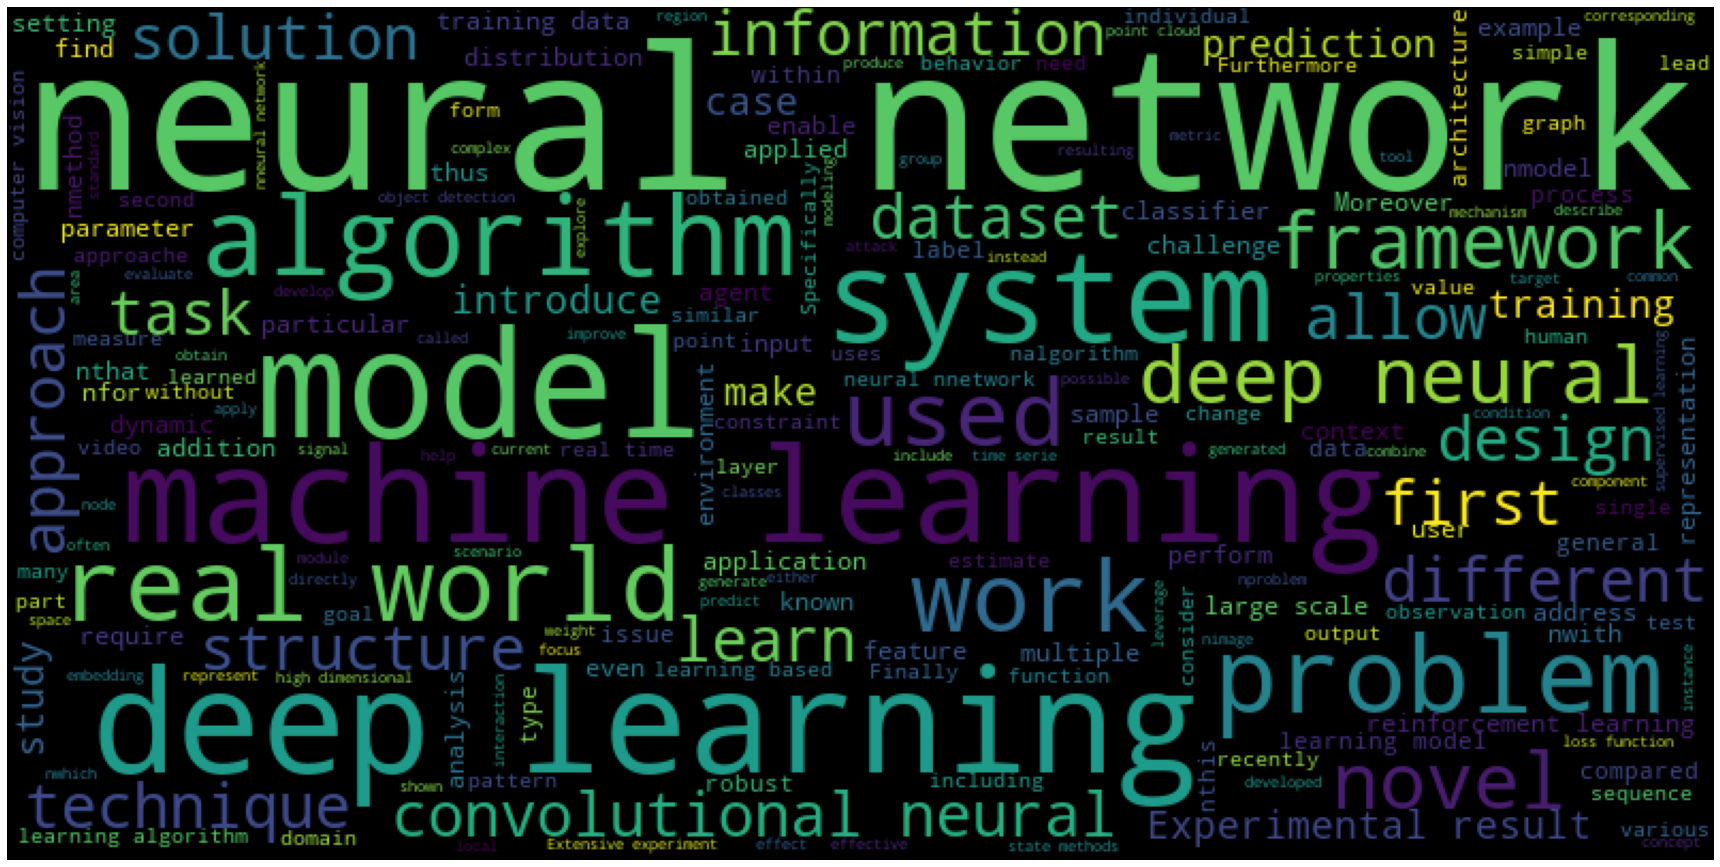

In [13]:
if show_wc(df_last_5_years):
    plt.savefig(f"last_5_years.png")

In [27]:
df_before_1_year = df_filtered[df_filtered["update_date"] < "2020-01-01"]
df_before_1_year.head()

id                                              title  \
46   0704.0047  Intelligent location of simultaneously active ...   
49   0704.0050  Intelligent location of simultaneously active ...   
303  0704.0304                  The World as Evolving Information   
670  0704.0671              Learning from compressed observations   
953  0704.0954  Sensor Networks with Random Links: Topology De...   

                                              abstract  \
46     The intelligent acoustic emission locator is...   
49     Part I describes an intelligent acoustic emi...   
303    This paper discusses the benefits of describ...   
670    The problem of statistical learning is to co...   
953    In a sensor network, in practice, the commun...   

                              authors update_date  \
46             T. Kosel and I. Grabec  2009-09-29   
49             T. Kosel and I. Grabec  2007-05-23   
303                 Carlos Gershenson  2013-04-05   
670                    Maxim Raginsky  2016-11-15   
953  Soummya Kar and Jose M. F. Moura  2009-11-13   

                       categories  
46                    cs.NE cs.AI  
49                    cs.NE cs.AI  
303  cs.IT cs.AI math.IT q-bio.PE  
670           cs.IT cs.LG math.IT  
953           cs.IT cs.LG math.IT

id                                              title  \
46              0704.0047  Intelligent location of simultaneously active ...   
49              0704.0050  Intelligent location of simultaneously active ...   
303             0704.0304                  The World as Evolving Information   
670             0704.0671              Learning from compressed observations   
953             0704.0954  Sensor Networks with Random Links: Topology De...   
...                   ...                                                ...   
1924880  quant-ph/0607111  `Plausibilities of plausibilities': an approac...   
1925361  quant-ph/0609117  Quantum Pattern Retrieval by Qubit Networks wi...   
1926592  quant-ph/0702072                    Markovian Entanglement Networks   
1928672  quant-ph/9802028       Analogue Quantum Computers for Data Analysis   
1930207  quant-ph/9907009  The importance of quantum decoherence in brain...   

                                                  abstract  \
46         The intelligent acoustic emission locator is...   
49         Part I describes an intelligent acoustic emi...   
303        This paper discusses the benefits of describ...   
670        The problem of statistical learning is to co...   
953        In a sensor network, in practice, the commun...   
...                                                    ...   
1924880    Probability-like parameters appearing in som...   
1925361    Qubit networks with long-range interactions ...   
1926592    Graphical models of probabilistic dependenci...   
1928672    Analogue computers use continuous properties...   
1930207    Based on a calculation of neural decoherence...   

                                                   authors update_date  \
46                                  T. Kosel and I. Grabec  2009-09-29   
49                                  T. Kosel and I. Grabec  2007-05-23   
303                                      Carlos Gershenson  2013-04-05   
670                                         Maxim Raginsky  2016-11-15   
953                       Soummya Kar and Jose M. F. Moura  2009-11-13   
...                                                    ...         ...   
1924880    P. G. L. Porta Mana, A. M{\aa}nsson, G. Bj\"ork  2007-05-23   
1925361    M.Cristina Diamantini and Carlo A. Trugenberger  2009-11-13   
1926592         Pierfrancesco La Mura and Lukasz Swiatczak  2011-11-09   
1928672  Alexander Yu. Vlasov (FCR/IRH, St.-Petersburg,...  2007-05-23   
1930207                                        Max Tegmark  2009-10-07   

                                                categories  
46                                             cs.NE cs.AI  
49                                             cs.NE cs.AI  
303                           cs.IT cs.AI math.IT q-bio.PE  
670                                    cs.IT cs.LG math.IT  
953                                    cs.IT cs.LG math.IT  
...                                                    ...  
1924880                                     quant-ph cs.AI  
1925361                     quant-ph cond-mat.dis-nn cs.NE  
1926592                                     quant-ph cs.AI  
1928672                                     quant-ph cs.CV  
1930207  quant-ph cond-mat.dis-nn cs.NE physics.bio-ph ...  

[80609 rows x 6 columns]

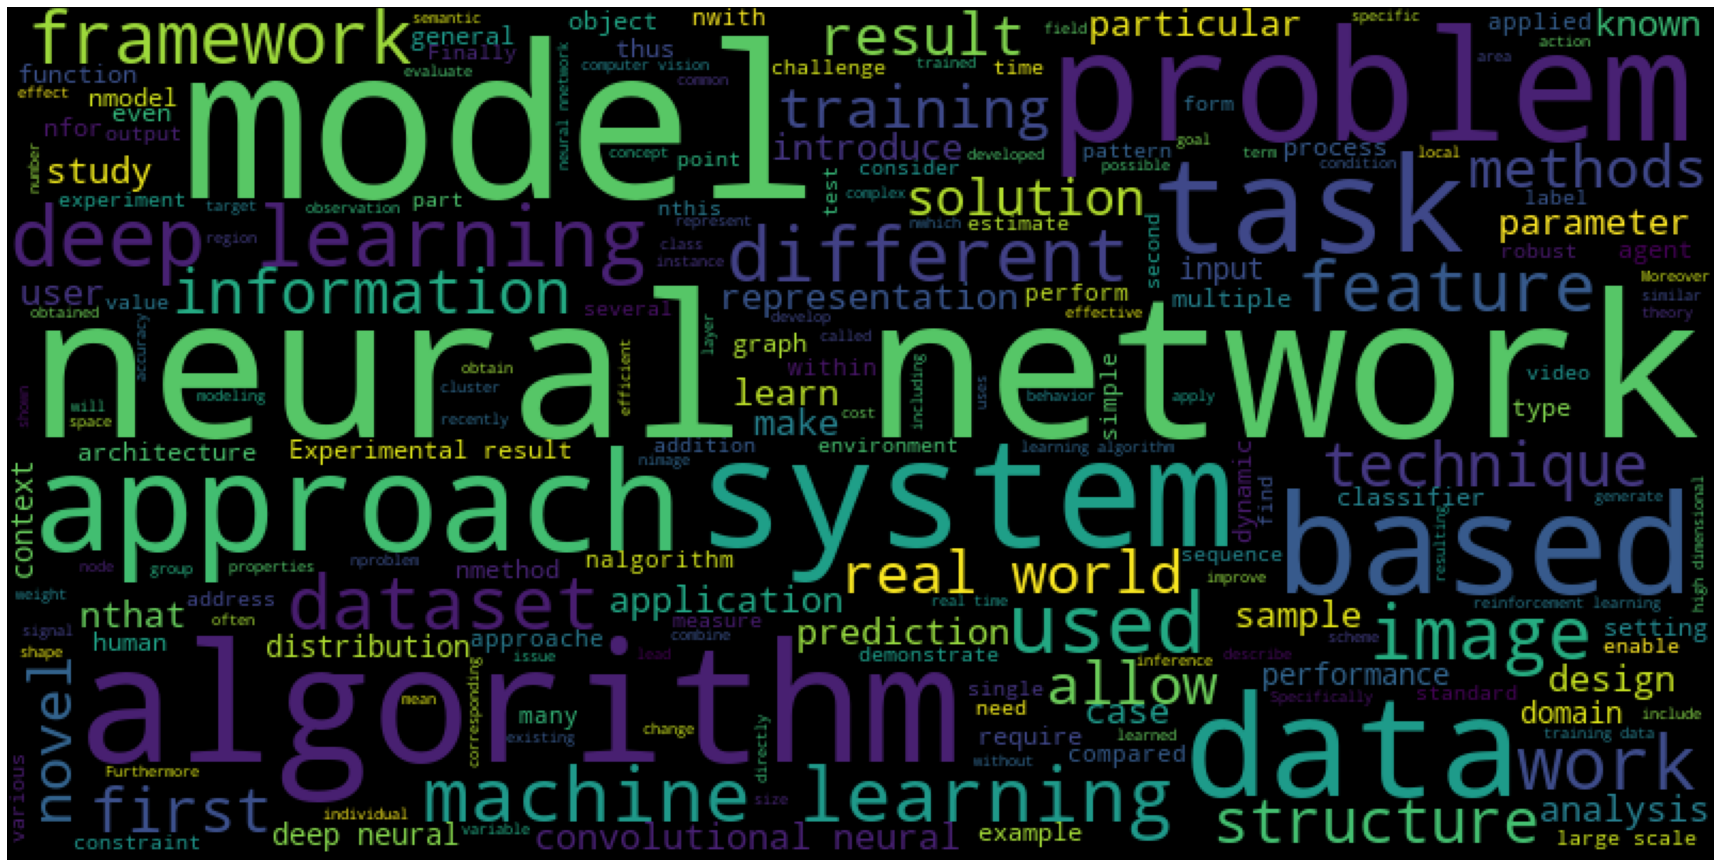

In [28]:
if show_wc(df_before_1_year):
    plt.savefig(f"df_before_1_year.png")

In [14]:
df_last_1_year = df_filtered[df_filtered["update_date"] > "2020-01-01"]
df_last_1_year.head()

id                                              title  \
16951   0707.3781  Bijective Faithful Translations among Default ...   
100572  0812.4446  The Latent Relation Mapping Engine: Algorithm ...   
130867  0906.4316                       Constructive Decision Theory   
203119  1007.3881  Orthogonal multifilters image processing of as...   
208636  1008.3879  A formalism for causal explanations with an An...   

                                                 abstract  \
16951     In this article, we study translations betwe...   
100572    Many AI researchers and cognitive scientists...   
130867    In most contemporary approaches to decision ...   
203119    In this paper orthogonal multifilters for as...   
208636    We examine the practicality for a user of us...   

                                                  authors update_date  \
16951                                    Paolo Liberatore  2021-04-12   
100572  Peter D. Turney (National Research Council of ...  2020-08-20   
130867  Lawrence Blume, David Easley, and Joseph Y. Ha...  2021-07-05   
203119                                        Vasil Kolev  2021-08-20   
208636                       Yves Moinard (INRIA - IRISA)  2020-07-17   

               categories  
16951         cs.AI cs.LO  
100572  cs.CL cs.AI cs.LG  
130867        cs.GT cs.AI  
203119        cs.CV cs.NA  
208636              cs.AI

id                                              title  \
16951     0707.3781  Bijective Faithful Translations among Default ...   
100572    0812.4446  The Latent Relation Mapping Engine: Algorithm ...   
130867    0906.4316                       Constructive Decision Theory   
203119    1007.3881  Orthogonal multifilters image processing of as...   
208636    1008.3879  A formalism for causal explanations with an An...   
...             ...                                                ...   
1680237  cs/0403032                Where Fail-Safe Default Logics Fail   
1680515  cs/0407034           On the Complexity of Case-Based Planning   
1681526  cs/0506074  Redundancy in Logic II: 2CNF and Horn Proposit...   
1681605  cs/0507048  Redundancy in Logic III: Non-Mononotonic Reaso...   
1682213  cs/0601043  Combining Relational Algebra, SQL, Constraint ...   

                                                  abstract  \
16951      In this article, we study translations betwe...   
100572     Many AI researchers and cognitive scientists...   
130867     In most contemporary approaches to decision ...   
203119     In this paper orthogonal multifilters for as...   
208636     We examine the practicality for a user of us...   
...                                                    ...   
1680237    Reiter's original definition of default logi...   
1680515    We analyze the computational complexity of p...   
1681526    We report complexity results about redundanc...   
1681605    Results about the redundancy of circumscript...   
1682213    The goal of this paper is to provide a stron...   

                                                   authors update_date  \
16951                                     Paolo Liberatore  2021-04-12   
100572   Peter D. Turney (National Research Council of ...  2020-08-20   
130867   Lawrence Blume, David Easley, and Joseph Y. Ha...  2021-07-05   
203119                                         Vasil Kolev  2021-08-20   
208636                        Yves Moinard (INRIA - IRISA)  2020-07-17   
...                                                    ...         ...   
1680237                                   Paolo Liberatore  2021-04-12   
1680515                                   Paolo Liberatore  2021-04-12   
1681526                                   Paolo Liberatore  2021-04-12   
1681605                                   Paolo Liberatore  2021-04-12   
1682213                      Marco Cadoli and Toni Mancini  2021-06-02   

                categories  
16951          cs.AI cs.LO  
100572   cs.CL cs.AI cs.LG  
130867         cs.GT cs.AI  
203119         cs.CV cs.NA  
208636               cs.AI  
...                    ...  
1680237        cs.AI cs.LO  
1680515        cs.AI cs.CC  
1681526        cs.AI cs.LO  
1681605  cs.LO cs.AI cs.CC  
1682213        cs.AI cs.LO  

[69157 rows x 6 columns]

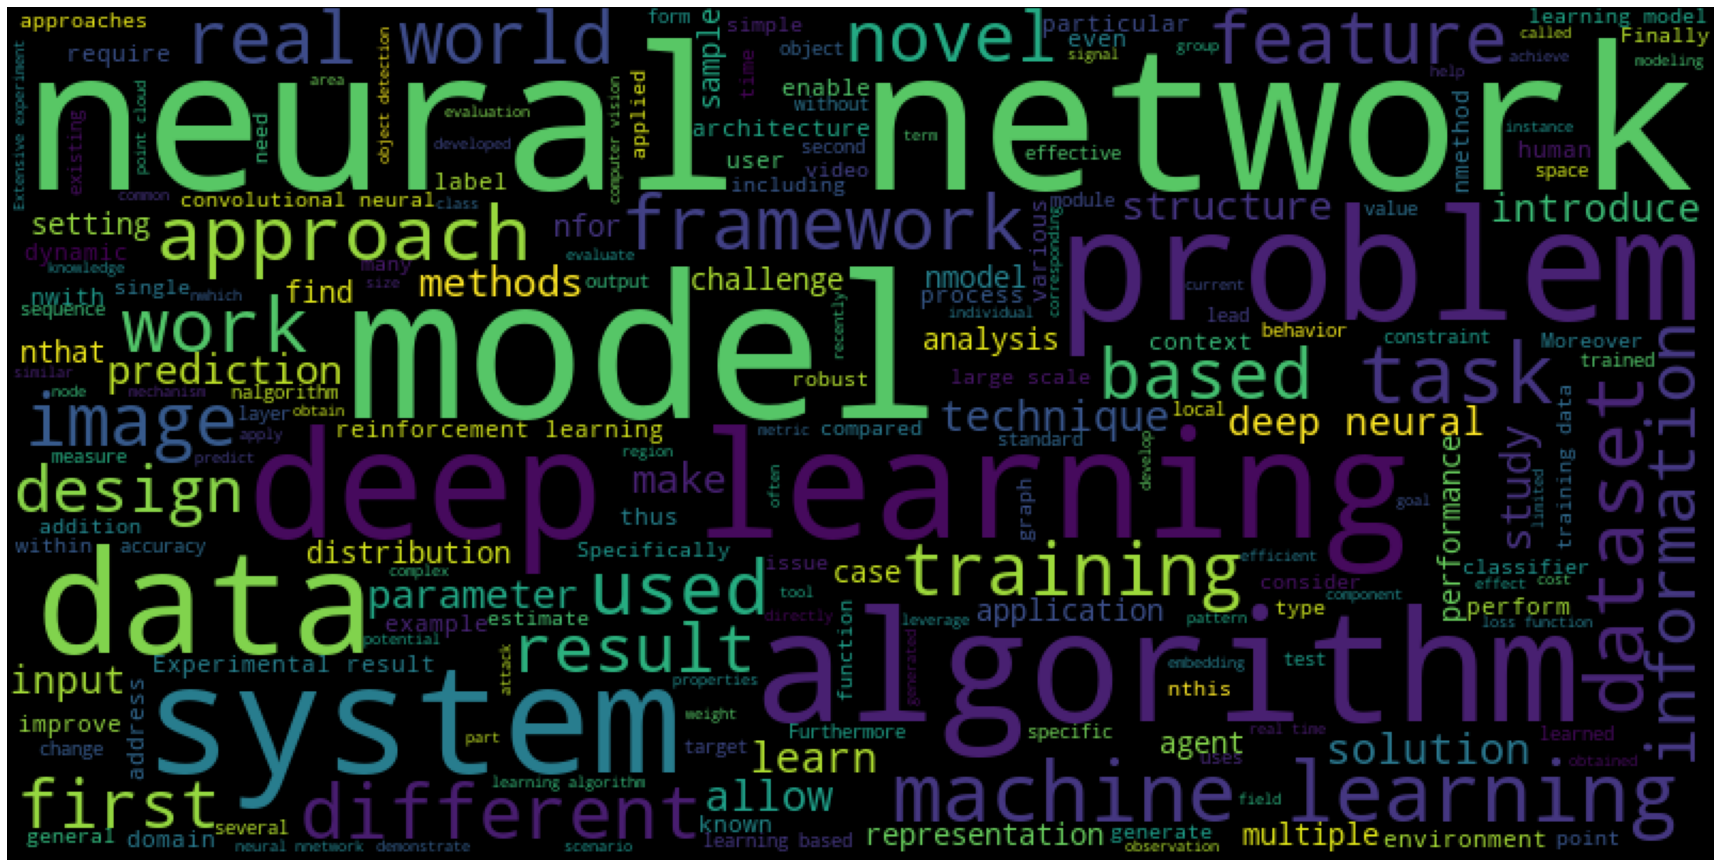

In [15]:
if show_wc(df_last_1_year):
    plt.savefig(f"last_1_year.png")

In [16]:
df_before_2010 = df_filtered[df_filtered["update_date"] < "2010-01-01"]
df_before_2010.head()

id                                              title  \
46    0704.0047  Intelligent location of simultaneously active ...   
49    0704.0050  Intelligent location of simultaneously active ...   
953   0704.0954  Sensor Networks with Random Links: Topology De...   
984   0704.0985  Architecture for Pseudo Acausal Evolvable Embe...   
1019  0704.1020  The on-line shortest path problem under partia...   

                                               abstract  \
46      The intelligent acoustic emission locator is...   
49      Part I describes an intelligent acoustic emi...   
953     In a sensor network, in practice, the commun...   
984     Advances in semiconductor technology are con...   
1019    The on-line shortest path problem is conside...   

                                                authors update_date  \
46                               T. Kosel and I. Grabec  2009-09-29   
49                               T. Kosel and I. Grabec  2007-05-23   
953                    Soummya Kar and Jose M. F. Moura  2009-11-13   
984                             Mohd Abubakr, R.M.Vinay  2007-05-23   
1019  Andras Gyorgy, Tamas Linder, Gabor Lugosi, Gyo...  2007-05-23   

               categories  
46            cs.NE cs.AI  
49            cs.NE cs.AI  
953   cs.IT cs.LG math.IT  
984           cs.NE cs.AI  
1019          cs.LG cs.SC

id                                              title  \
46              0704.0047  Intelligent location of simultaneously active ...   
49              0704.0050  Intelligent location of simultaneously active ...   
953             0704.0954  Sensor Networks with Random Links: Topology De...   
984             0704.0985  Architecture for Pseudo Acausal Evolvable Embe...   
1019            0704.1020  The on-line shortest path problem under partia...   
...                   ...                                                ...   
1922033  quant-ph/0507231  Algebras of Measurements: the logical structur...   
1924880  quant-ph/0607111  `Plausibilities of plausibilities': an approac...   
1925361  quant-ph/0609117  Quantum Pattern Retrieval by Qubit Networks wi...   
1928672  quant-ph/9802028       Analogue Quantum Computers for Data Analysis   
1930207  quant-ph/9907009  The importance of quantum decoherence in brain...   

                                                  abstract  \
46         The intelligent acoustic emission locator is...   
49         Part I describes an intelligent acoustic emi...   
953        In a sensor network, in practice, the commun...   
984        Advances in semiconductor technology are con...   
1019       The on-line shortest path problem is conside...   
...                                                    ...   
1922033    In Quantum Physics, a measurement is represe...   
1924880    Probability-like parameters appearing in som...   
1925361    Qubit networks with long-range interactions ...   
1928672    Analogue computers use continuous properties...   
1930207    Based on a calculation of neural decoherence...   

                                                   authors update_date  \
46                                  T. Kosel and I. Grabec  2009-09-29   
49                                  T. Kosel and I. Grabec  2007-05-23   
953                       Soummya Kar and Jose M. F. Moura  2009-11-13   
984                                Mohd Abubakr, R.M.Vinay  2007-05-23   
1019     Andras Gyorgy, Tamas Linder, Gabor Lugosi, Gyo...  2007-05-23   
...                                                    ...         ...   
1922033    Daniel Lehmann, Kurt Engesser and Dov M. Gabbay  2007-05-23   
1924880    P. G. L. Porta Mana, A. M{\aa}nsson, G. Bj\"ork  2007-05-23   
1925361    M.Cristina Diamantini and Carlo A. Trugenberger  2009-11-13   
1928672  Alexander Yu. Vlasov (FCR/IRH, St.-Petersburg,...  2007-05-23   
1930207                                        Max Tegmark  2009-10-07   

                                                categories  
46                                             cs.NE cs.AI  
49                                             cs.NE cs.AI  
953                                    cs.IT cs.LG math.IT  
984                                            cs.NE cs.AI  
1019                                           cs.LG cs.SC  
...                                                    ...  
1922033                                     quant-ph cs.AI  
1924880                                     quant-ph cs.AI  
1925361                     quant-ph cond-mat.dis-nn cs.NE  
1928672                                     quant-ph cs.CV  
1930207  quant-ph cond-mat.dis-nn cs.NE physics.bio-ph ...  

[2546 rows x 6 columns]

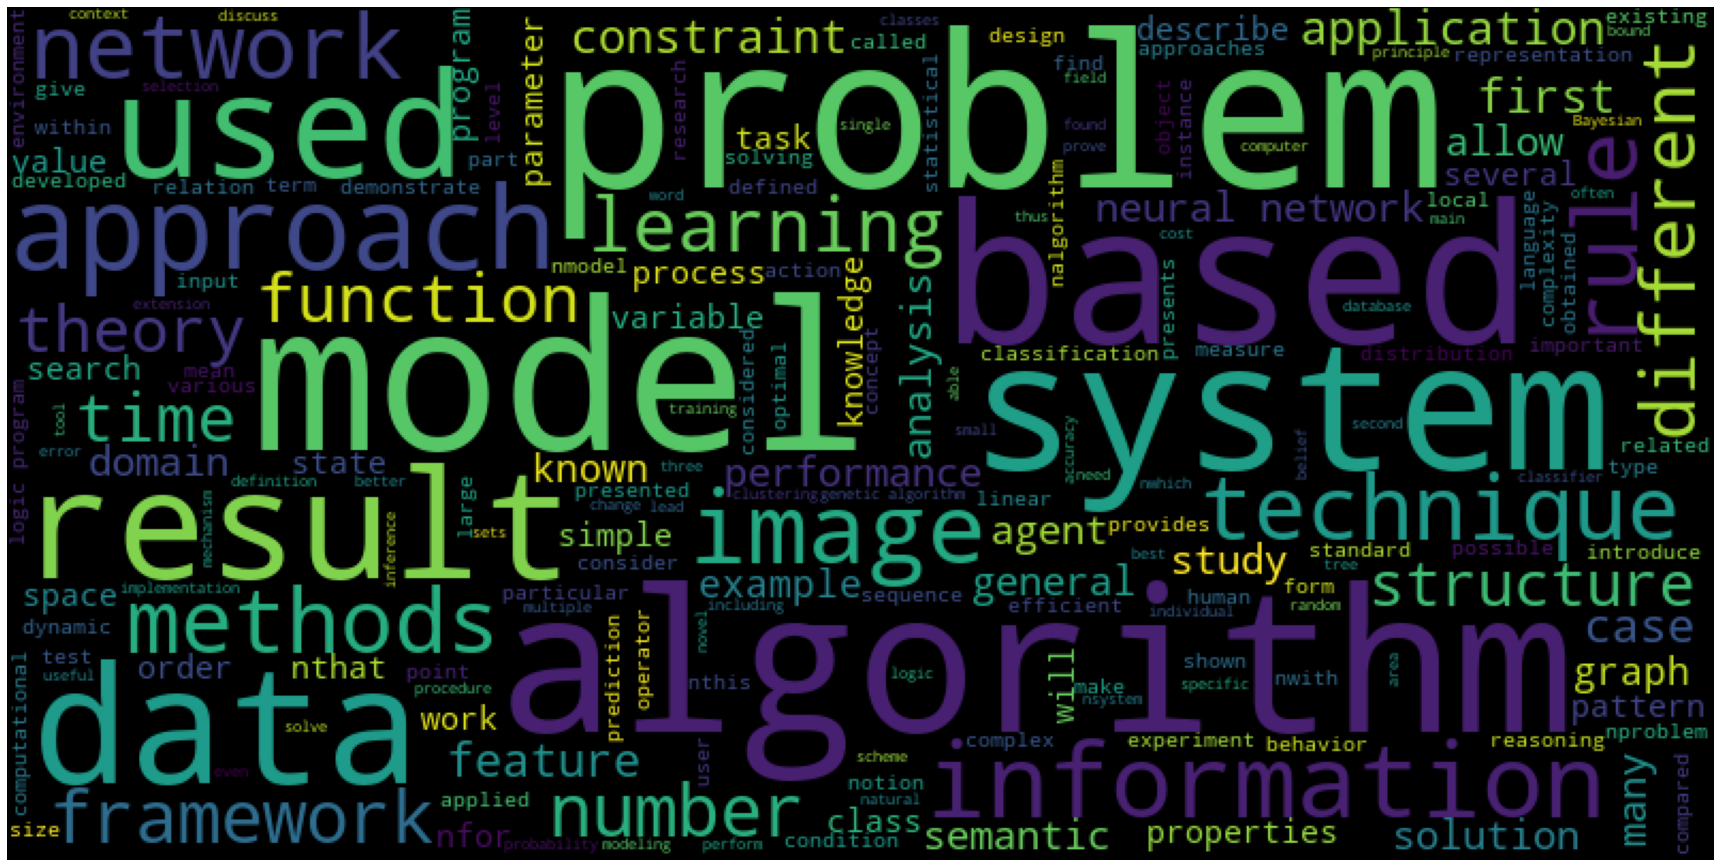

In [17]:
if show_wc(df_before_2010):
    plt.savefig(f"df_before_2010.png")

In [18]:
df_after_2010 = df_filtered[df_filtered["update_date"] > "2010-01-01"]
df_after_2010.head()

id                                              title  \
303   0704.0304                  The World as Evolving Information   
670   0704.0671              Learning from compressed observations   
1408  0704.1409        Preconditioned Temporal Difference Learning   
1674  0704.1675  Exploiting Social Annotation for Automatic Res...   
2724  0704.2725  Exploiting Heavy Tails in Training Times of Mu...   

                                               abstract  \
303     This paper discusses the benefits of describ...   
670     The problem of statistical learning is to co...   
1408    This paper has been withdrawn by the author....   
1674    Information integration applications, such a...   
2724    The random initialization of weights of a mu...   

                                       authors update_date  \
303                          Carlos Gershenson  2013-04-05   
670                             Maxim Raginsky  2016-11-15   
1408                             Yao HengShuai  2012-06-11   
1674  Anon Plangprasopchok and Kristina Lerman  2016-09-08   
2724          Manuel Cebrian and Ivan Cantador  2011-11-09   

                        categories  
303   cs.IT cs.AI math.IT q-bio.PE  
670            cs.IT cs.LG math.IT  
1408                   cs.LG cs.AI  
1674             cs.AI cs.CY cs.DL  
2724                         cs.NE

id                                              title  \
303             0704.0304                  The World as Evolving Information   
670             0704.0671              Learning from compressed observations   
1408            0704.1409        Preconditioned Temporal Difference Learning   
1674            0704.1675  Exploiting Social Annotation for Automatic Res...   
2724            0704.2725  Exploiting Heavy Tails in Training Times of Mu...   
...                   ...                                                ...   
1908787     q-bio/0507037  Neuromodulation Influences Synchronization and...   
1908984     q-bio/0511045  The use of the GARP genetic algorithm and inte...   
1909209     q-bio/0605020              Laws in Darwinian Evolutionary Theory   
1914053  quant-ph/0205161  Contextualizing Concepts using a Mathematical ...   
1926592  quant-ph/0702072                    Markovian Entanglement Networks   

                                                  abstract  \
303        This paper discusses the benefits of describ...   
670        The problem of statistical learning is to co...   
1408       This paper has been withdrawn by the author....   
1674       Information integration applications, such a...   
2724       The random initialization of weights of a mu...   
...                                                    ...   
1908787    Background: The roles of neuromodulation in ...   
1908984    Lifemapper (http://www.lifemapper.org) is a ...   
1909209    In the present article the recent works to f...   
1914053    We outline the rationale and preliminary res...   
1926592    Graphical models of probabilistic dependenci...   

                                                   authors update_date  \
303                                      Carlos Gershenson  2013-04-05   
670                                         Maxim Raginsky  2016-11-15   
1408                                         Yao HengShuai  2012-06-11   
1674              Anon Plangprasopchok and Kristina Lerman  2016-09-08   
2724                      Manuel Cebrian and Ivan Cantador  2011-11-09   
...                                                    ...         ...   
1908787                                   Gabriele Scheler  2019-06-25   
1908984  David R.B. Stockwell, James H. Beach, Aimee St...  2011-11-09   
1909209                                               P Ao  2016-09-08   
1914053                    Liane Gabora and Diederik Aerts  2013-11-02   
1926592         Pierfrancesco La Mura and Lukasz Swiatczak  2011-11-09   

                                                categories  
303                           cs.IT cs.AI math.IT q-bio.PE  
670                                    cs.IT cs.LG math.IT  
1408                                           cs.LG cs.AI  
1674                                     cs.AI cs.CY cs.DL  
2724                                                 cs.NE  
...                                                    ...  
1908787                             q-bio.NC cs.NE nlin.AO  
1908984                      q-bio.QM cs.DC cs.NE q-bio.OT  
1909209  q-bio.PE cond-mat.stat-mech cs.NE math.OC nlin...  
1914053                            quant-ph cs.AI q-bio.NC  
1926592                                     quant-ph cs.AI  

[147393 rows x 6 columns]

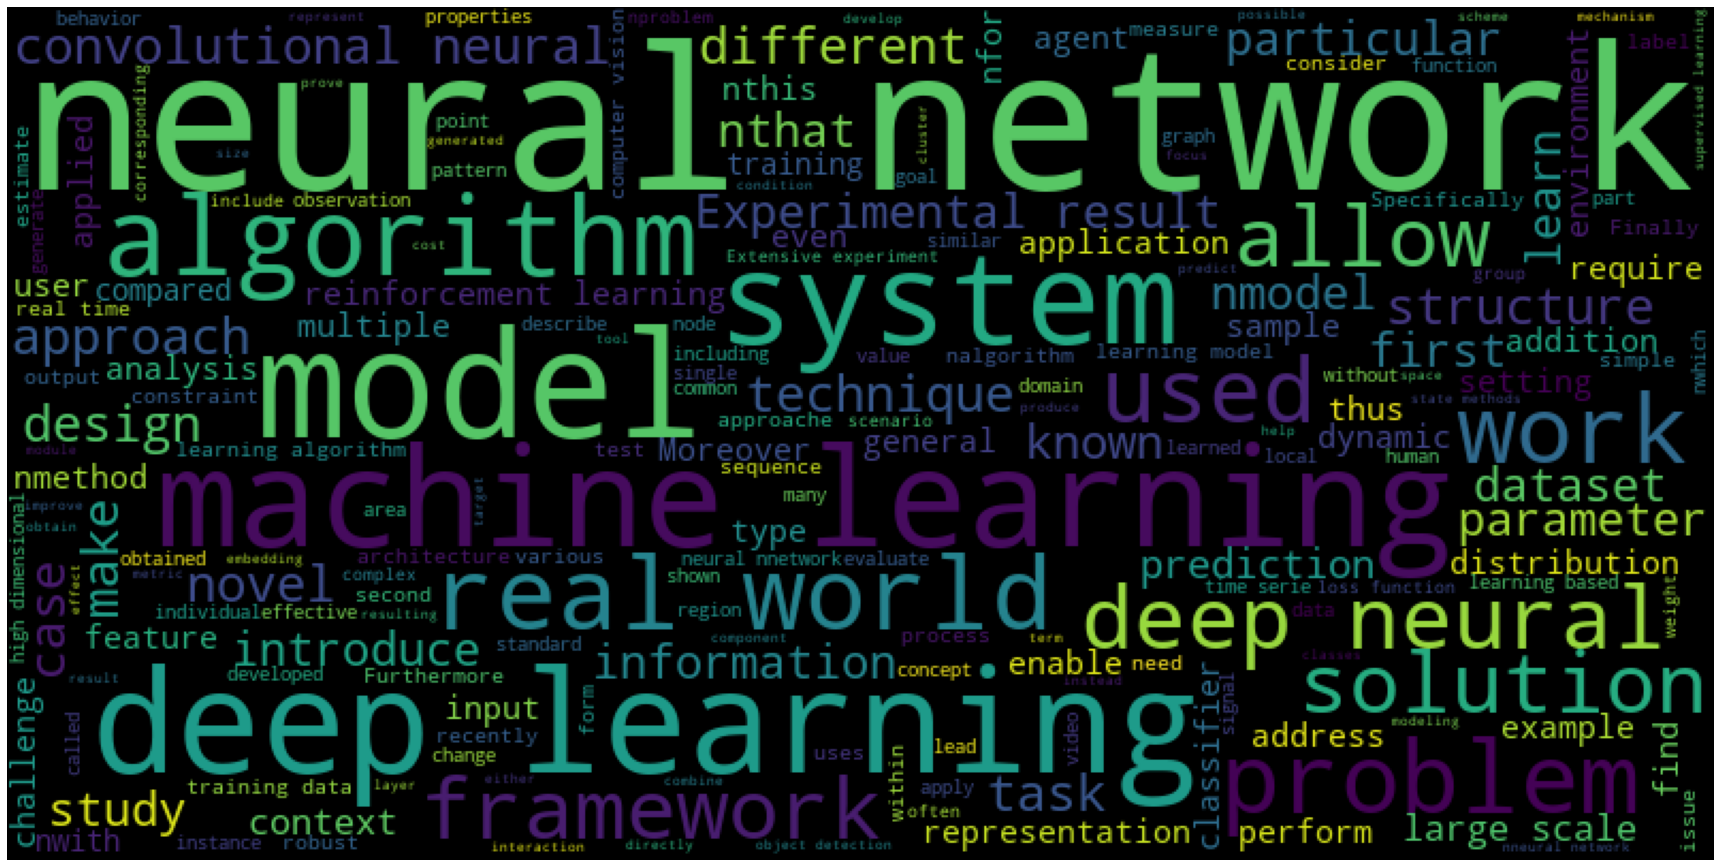

In [19]:
if show_wc(df_after_2010):
    plt.savefig(f"df_after_2010.png")